# Task 7 
# Stock Market Prediction using Numerical and Textual Analysis(Level - Advanced)
# Name - Sameer Dhole

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns  

In [2]:
df = pd.read_csv(r"C:\Users\prani\Downloads\india-news-headlines.csv")

In [3]:
df

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [4]:
!pip install pmdarima

In [5]:
!pip install nsepy 

In [6]:
!pip install textblob

In [7]:
!pip install xgboost

In [8]:
!pip install lightgbm

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import seaborn as sns    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df_prices = pd.read_csv(r'C:\Users\prani\Downloads\BSESN.csv')
print(df_prices.head())
print(df_prices.size)

         Date         Open         High          Low        Close  \
0  1997-07-01  4263.109863  4301.770020  4247.660156  4300.859863   
1  1997-07-02  4302.959961  4395.310059  4295.399902  4333.899902   
2  1997-07-03  4335.790039  4393.290039  4299.970215  4323.459961   
3  1997-07-04  4332.700195  4347.589844  4300.580078  4323.819824   
4  1997-07-07  4326.810059  4391.009766  4289.490234  4291.450195   

     Adj Close  Volume  
0  4300.859863     0.0  
1  4333.899902     0.0  
2  4323.459961     0.0  
3  4323.819824     0.0  
4  4291.450195     0.0  
41580


In [4]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5940 non-null   datetime64[ns]
 1   Open       5808 non-null   float64       
 2   High       5808 non-null   float64       
 3   Low        5808 non-null   float64       
 4   Close      5808 non-null   float64       
 5   Adj Close  5808 non-null   float64       
 6   Volume     5808 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 325.0 KB


In [5]:
df_prices.dropna(inplace = True)
df_prices.isnull().sum().sum()

0

Text(0, 0.5, 'Open')

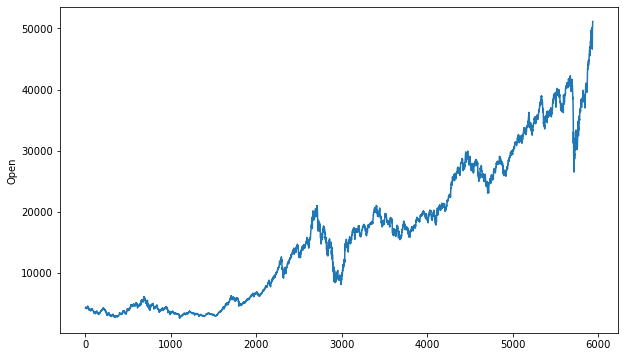

In [6]:
plt.figure(figsize=(10, 6))
df_prices['Open'].plot()
plt.ylabel('Open')

Text(0, 0.5, 'Close')

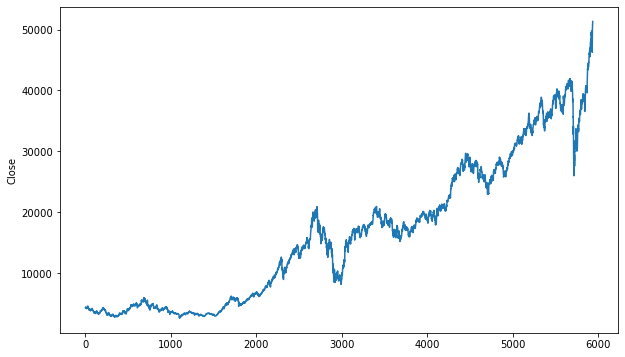

In [7]:
plt.figure(figsize=(10, 6))
df_prices['Close'].plot()
plt.ylabel('Close')

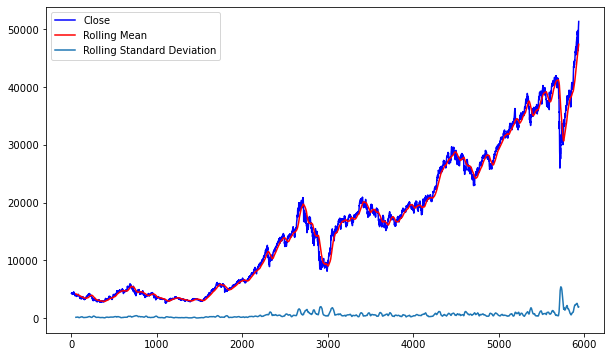

In [8]:
close = df_prices['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

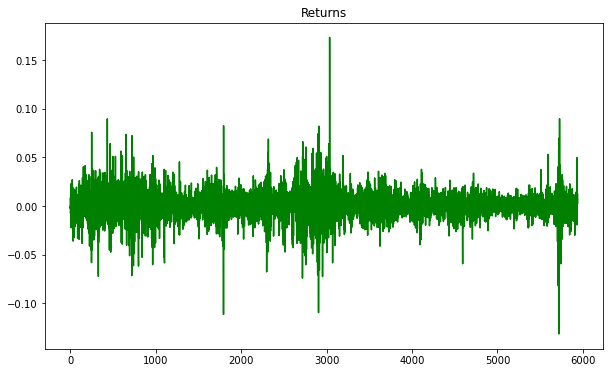

In [9]:
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [10]:
train = df_prices[:4000]
test = df_prices[4000:]

# Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model

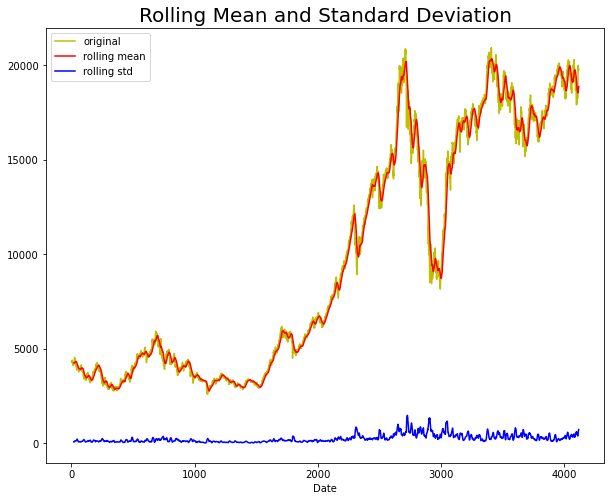

Results of dickey fuller test
ADF Test Statistic : -0.5337243968121556
p-value : 0.8852657072203782
#Lags Used : 19
Number of Observations Used : 3980
Weak evidence against null hypothesis, time series is non-stationary 


In [11]:
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

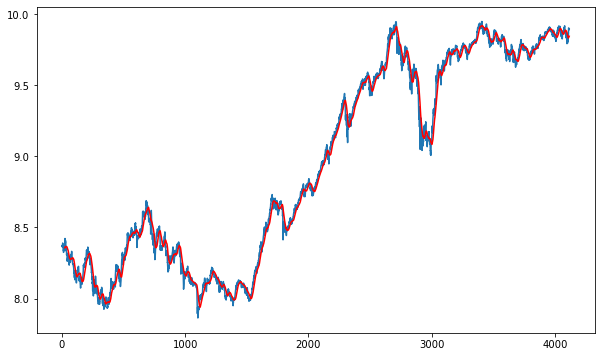

In [12]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [15]:
train = df_prices[5000:5500]
test = df_prices[5500:]
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5125,2017-10-24,32619.259766,32670.369141,32502.080078,32607.339844,32607.339844,8400.0
5126,2017-10-25,32995.281250,33117.328125,32804.601563,33042.500000,33042.500000,29900.0
5127,2017-10-26,33025.171875,33196.171875,32835.058594,33147.128906,33147.128906,15500.0
5128,2017-10-27,33228.320313,33286.511719,33109.410156,33157.218750,33157.218750,18300.0
5129,2017-10-30,33260.101563,33340.171875,33206.929688,33266.160156,33266.160156,14000.0


In [16]:
train_open= train.iloc[:, 1:2].values

In [17]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [18]:
train_open_scaled[60]

array([0.27394721])

In [19]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [20]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [21]:
xtrain.shape

(440, 60, 1)

In [22]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [23]:

#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.126 - 11s 98ms/step - loss: 0.1226
Epoch 2/100
15/15 [==============================] - 1s 93ms/step - loss: 0.0243
Epoch 3/100
15/15 [==============================] - 1s 88ms/step - loss: 0.0220
Epoch 4/100
15/15 [==============================] - 1s 88ms/step - loss: 0.0172
Epoch 5/100
15/15 [==============================] - 1s 90ms/step - loss: 0.0179
Epoch 6/100
15/15 [==============================] - 1s 87ms/step - loss: 0.0168
Epoch 7/100
15/15 [==============================] - 1s 87ms/step - loss: 0.0148
Epoch 8/100
15/15 [==============================] - 1s 84ms/step - loss: 0.0135
Epoch 9/100
15/15 [==============================] - 1s 86ms/step - loss: 0.0162
Epoch 10/100
15/15 [==============================] - 1s 92ms/step - loss: 0.0132: 0s - lo
Epoch 11/100
15/15 [==============================] - 1s 87ms/step - loss: 0.0129
Epoch 12/100
15/15 [==============================] - 1s 85ms/step - loss

In [24]:
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [25]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [26]:
xtest= np.array(xtest)

In [27]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

In [28]:
predicted_value= ss.inverse_transform(predicted_value)

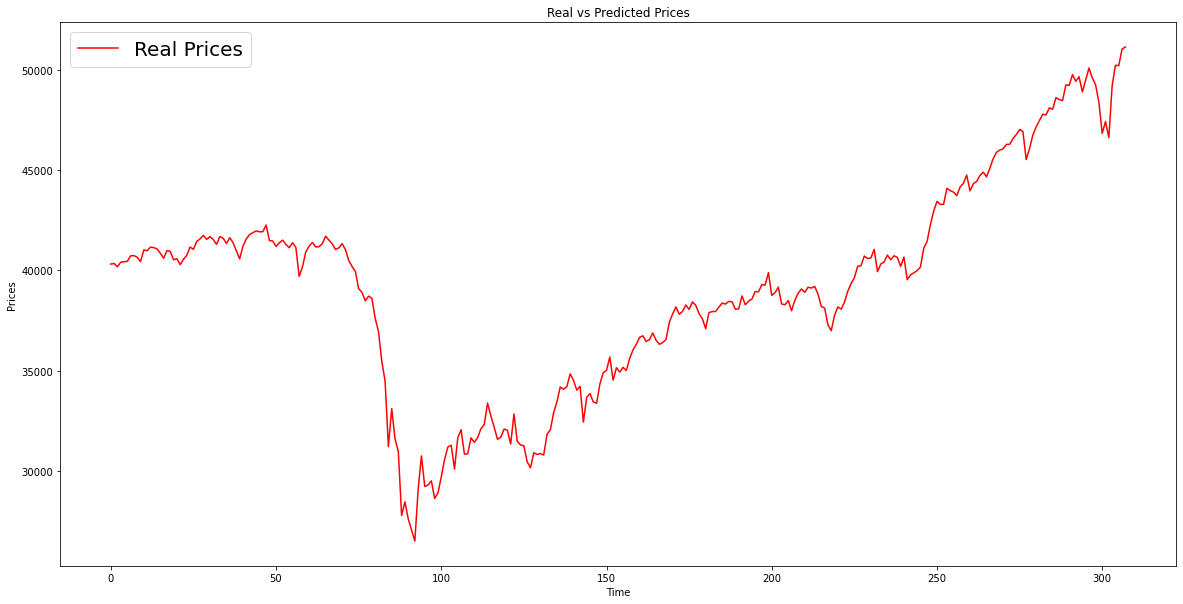

In [35]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
#plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

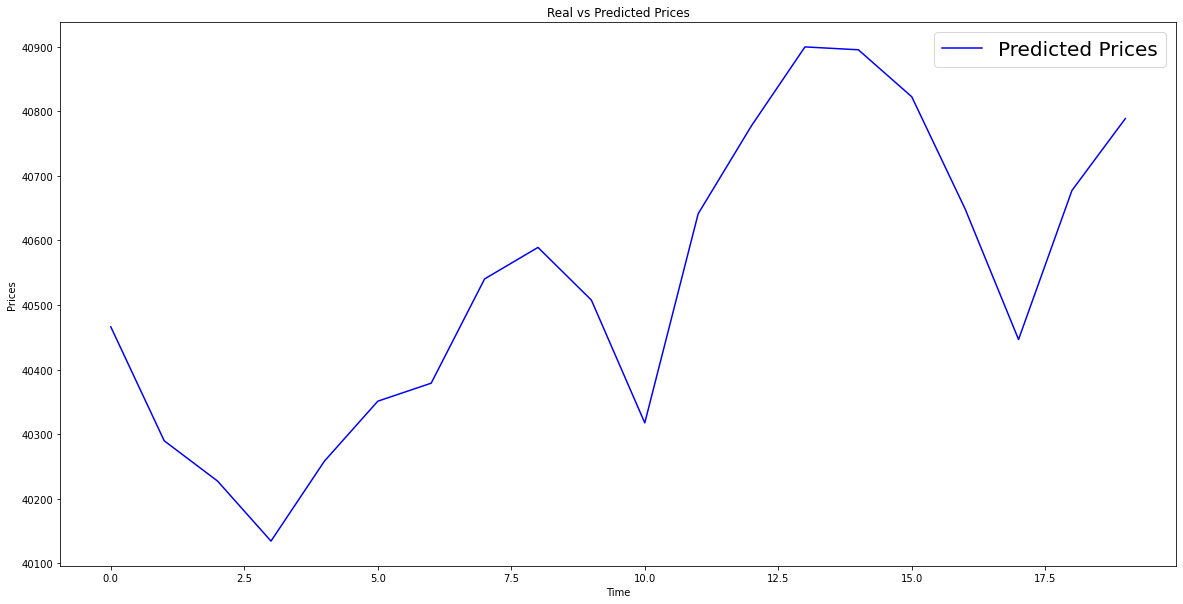

In [38]:
plt.figure(figsize=(20,10))
#plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [39]:
from keras.wrappers.scikit_learn import KerasRegressor

In [40]:

def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)


In [41]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/25
11/11 [==============================] - 10s 64ms/step - loss: 0.1507
Epoch 2/25
11/11 [==============================] - 1s 66ms/step - loss: 0.0267
Epoch 3/25
11/11 [==============================] - 1s 61ms/step - loss: 0.0330
Epoch 4/25
11/11 [==============================] - 1s 55ms/step - loss: 0.0348
Epoch 5/25
11/11 [==============================] - 1s 55ms/step - loss: 0.0276
Epoch 6/25
11/11 [==============================] - 1s 50ms/step - loss: 0.0229
Epoch 7/25
11/11 [==============================] - 1s 52ms/step - loss: 0.0181
Epoch 8/25
11/11 [==============================] - 1s 52ms/step - loss: 0.0248
Epoch 9/25
11/11 [==============================] - 1s 53ms/step - loss: 0.0184
Epoch 10/25
11/11 [==============================] - 1s 55ms/step - loss: 0.0219
Epoch 11/25
11/11 [==============================] - 1s 53ms/step - loss: 0.0158
Epoch 12/25
11/11 [==============================] - 1s 52ms/step - loss: 0.0181
Epoch 13/25
11/11 [=================

In [42]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/25
14/14 [==============================] - 8s 69ms/step - loss: 0.1542
Epoch 2/25
14/14 [==============================] - 1s 65ms/step - loss: 0.0301
Epoch 3/25
14/14 [==============================] - 1s 65ms/step - loss: 0.0243
Epoch 4/25
14/14 [==============================] - 1s 67ms/step - loss: 0.0267
Epoch 5/25
14/14 [==============================] - 1s 68ms/step - loss: 0.0263
Epoch 6/25
14/14 [==============================] - 1s 65ms/step - loss: 0.0246
Epoch 7/25
14/14 [==============================] - 1s 65ms/step - loss: 0.0241
Epoch 8/25
14/14 [==============================] - 1s 65ms/step - loss: 0.0169
Epoch 9/25
14/14 [==============================] - 1s 65ms/step - loss: 0.0212
Epoch 10/25
14/14 [==============================] - 1s 65ms/step - loss: 0.0196
Epoch 11/25
14/14 [==============================] - 1s 64ms/step - loss: 0.0169
Epoch 12/25
14/14 [==============================] - 1s 64ms/step - loss: 0.0157
Epoch 13/25
14/14 [==================

In [43]:
model

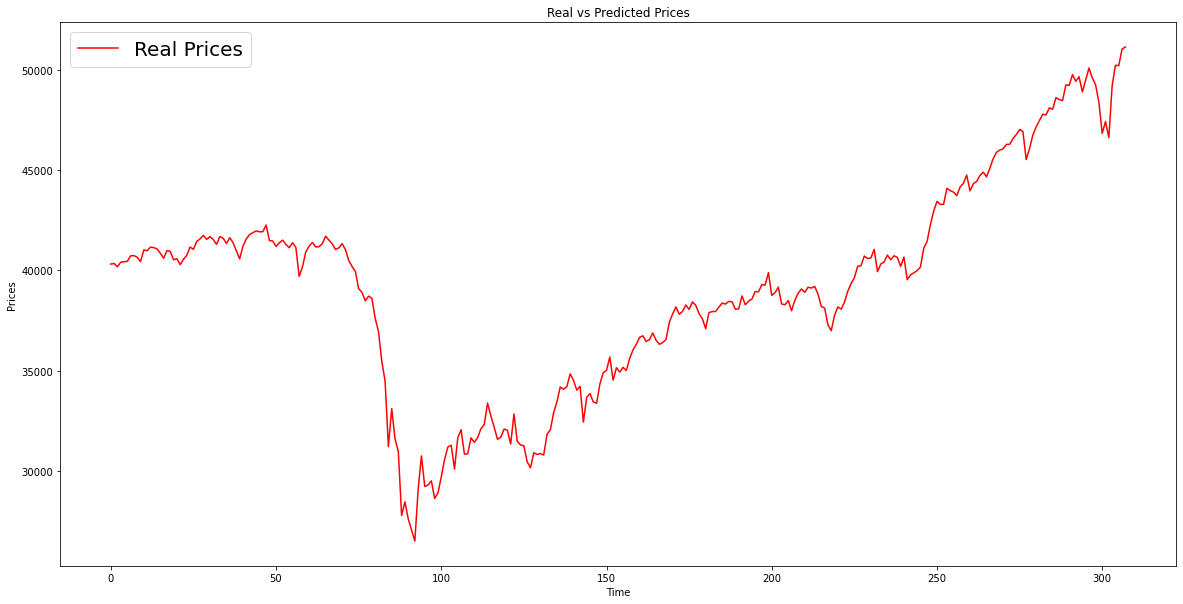

In [44]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
#plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

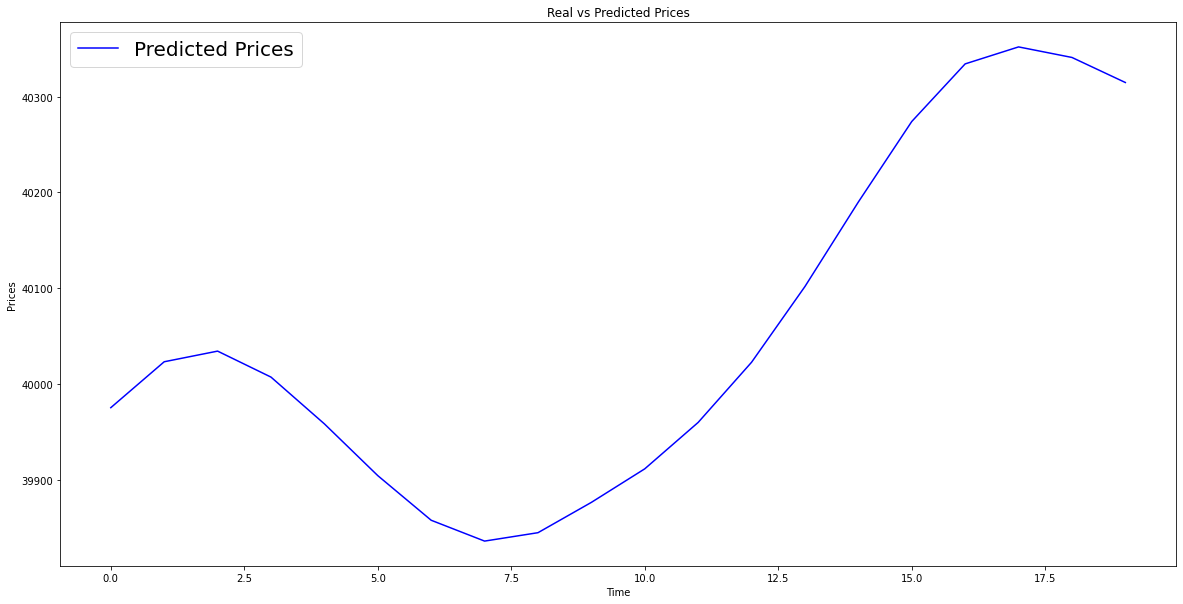

In [45]:
plt.figure(figsize=(20,10))
#plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

# Textual Analysis

In [46]:
cols = ['Date','Category','News']
df_news = pd.read_csv(r'C:\Users\prani\Downloads\india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [47]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [49]:
#Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [50]:
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [51]:
df_news['News']

0       win over cena satisfying but defeating underta...
1       Status quo will not be disturbed at Ayodhya; s...
2       Powerless north India gropes in the dark Think...
3       The string that pulled Stephen Hawking to Indi...
4       Light combat craft takes India into club class...
                              ...                        
7075    Containment zone residents slam high prices ch...
7076    like me i wont let you have a toxic relationsh...
7077    Atanu Ghosh plans to rewrite old scripts to ma...
7078    6 hot and stylish bikini looks of Katrina Kaif...
7079    Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
Name: News, Length: 7080, dtype: object

In [52]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [53]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
2,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
4,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
...,...,...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...,0.381841,0.068333
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.398808,0.079290
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.402636,0.057636
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956


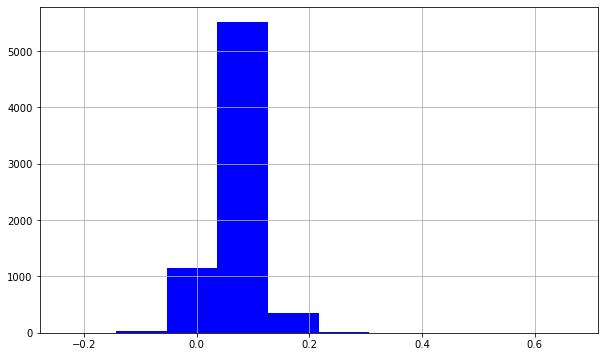

In [54]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'blue')

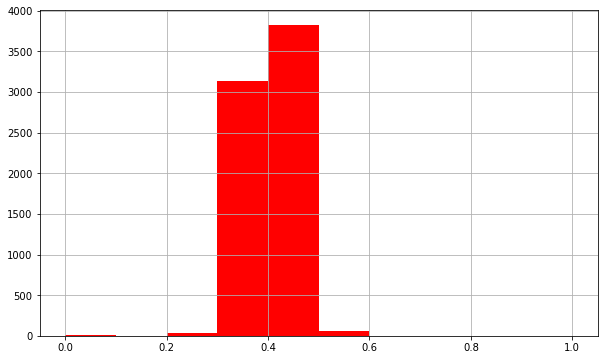

In [55]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'red')

In [56]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
2,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
4,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
...,...,...,...,...,...,...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...,0.381841,0.068333,-0.9999,0.163,0.748,0.089
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.398808,0.079290,-0.9999,0.159,0.749,0.092
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.402636,0.057636,-0.9999,0.151,0.774,0.075
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956,-0.9999,0.144,0.770,0.086


In [57]:
df_merge = pd.merge(df_prices, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214,-0.9779,0.121,0.812,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4761,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,I never thought I had a voice until today: Vid...,0.387802,0.088329,-0.9999,0.136,0.786,0.078
4762,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,Truck firms look for new export markets to sel...,0.403998,0.027038,-0.9999,0.142,0.794,0.064
4763,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,Containment zone residents slam high prices ch...,0.381841,0.068333,-0.9999,0.163,0.748,0.089
4764,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956,-0.9999,0.144,0.770,0.086


In [58]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,4018.879883,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,4060.020020,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,4115.370117,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,4183.729980,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,4120.430176,0.414653,-0.019214,-0.9779,0.121,0.812,0.066
...,...,...,...,...,...,...,...
4761,34868.980469,0.387802,0.088329,-0.9999,0.136,0.786,0.078
4762,34842.101563,0.403998,0.027038,-0.9999,0.142,0.794,0.064
4763,35171.269531,0.381841,0.068333,-0.9999,0.163,0.748,0.089
4764,34961.519531,0.396828,0.061956,-0.9999,0.144,0.770,0.086


In [59]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.036053,0.282333,0.524545,0.00945,0.274775,0.807,0.116776
1,0.037098,0.407692,0.438811,0.36800,0.274775,0.766,0.182566
2,0.038505,0.446847,0.438129,0.93690,0.225225,0.797,0.169408
3,0.040242,0.476612,0.675488,0.98845,0.279279,0.719,0.258224
4,0.038633,0.414653,0.291981,0.01105,0.272523,0.812,0.108553


In [60]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [61]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.524545,0.00945,0.274775,0.807,0.116776
1,0.407692,0.438811,0.36800,0.274775,0.766,0.182566
2,0.446847,0.438129,0.93690,0.225225,0.797,0.169408
3,0.476612,0.675488,0.98845,0.279279,0.719,0.258224
4,0.414653,0.291981,0.01105,0.272523,0.812,0.108553


In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(3812, 6)

In [63]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1960,0.439158,0.452625,0.00005,0.396396,0.714,0.180921
1085,0.448260,0.506163,0.00260,0.331081,0.755,0.161184
4139,0.406204,0.393557,0.00065,0.272523,0.780,0.162829
1834,0.423359,0.442225,0.00035,0.373874,0.725,0.179276
1721,0.379697,0.506642,0.00025,0.387387,0.740,0.144737
4198,0.397769,0.374794,0.00005,0.351351,0.757,0.143092
638,0.454812,0.400805,0.01445,0.195946,0.842,0.116776
1530,0.330529,0.391311,0.00095,0.308559,0.809,0.090461
185,0.354092,0.449472,0.00040,0.340090,0.769,0.131579
4176,0.419004,0.396476,0.00005,0.358108,0.749,0.151316


In [64]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [65]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.27477439 0.36458187 0.66069382 0.10597646 0.11828464 0.54789472
 0.40012026 0.26868737 0.6590654  0.41998742]
125     0.018197
1941    0.166762
4682    0.957527
1351    0.193804
1387    0.235150
4739    0.713359
2550    0.401351
352     0.017545
4090    0.745119
2921    0.422569
Name: Close, dtype: float64
0.02731427078572993


In [66]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [67]:
print(mean_squared_error(predictions, y_test))

0.034442027009157286


In [68]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [69]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.05821763 0.34217132 0.44368709 0.03286423 0.02484644 0.43963756
 0.37619149 0.35619024 0.69359442 0.15435431]
125     0.018197
1941    0.166762
4682    0.957527
1351    0.193804
1387    0.235150
4739    0.713359
2550    0.401351
352     0.017545
4090    0.745119
2921    0.422569
Name: Close, dtype: float64
0.051777519152047306


In [70]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor()

In [71]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.02582552064509269


In [72]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.029056369802532026


# We observe that Xgboost model performs the best for the sentiment analysis